In [32]:
import numpy as np
import matplotlib.pyplot as plt

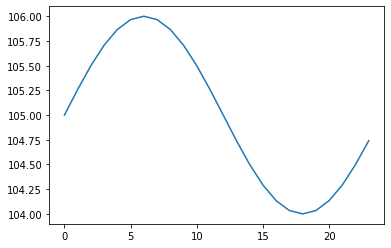

In [34]:
fig,ax = plt.subplots(1,1)

t = np.arange(0, 24, 1)
y = np.sin(2*np.pi*t/24) + 105
ax.plot(t, y)

In [42]:
dat = np.array((t, np.zeros(len(t)), np.zeros(len(t)),y))
np.savetxt('stage.txt', dat.T, fmt='%.2f', header = 'TIME_UNITS hr\nDATA_UNITS m', comments='')

add moving line

In [ ]:
fig,ax = plt.subplots(1,1)

x = np.arange(0, 2*np.pi, 0.1)
y = np.sin(x)
ax.plot(x, y)
ax.plot([2,2], [-1,1])

## Preplot frames

In [ ]:
x = np.arange(0, 2*np.pi, 0.1)
y = np.sin(x)

for i in np.arange(7):
    fig,ax = plt.subplots(1,1)
    ax.plot(x, y)
    
    ax.plot([i,i], [-1,1])
    ax.set_title(i)
    
    fig.savefig('./animation/sine' + str(i) + '.png')
    plt.close(fig)

### make animation using ImageMagick

- https://imagemagick.org/index.php
- https://imagemagick.org/Usage/anim_basics/

In [ ]:
%%script bash
convert -delay 10 -loop 0 ./animation/*.png ./animation/sine.gif

## Make animation all at once

In [ ]:
from matplotlib.animation import FuncAnimation

In [ ]:
x = np.arange(0, 2*np.pi, 0.1)
y = np.sin(x)

fig, ax = plt.subplots()
line, = ax.plot(x, y)

def update(num, x, y, line):
    line.set_data(x[:num], y[:num])
    line.axes.axis([0, 2*np.pi, -1, 1])
    return line,

ani = FuncAnimation(fig, func = update, frames = len(x), fargs=[x, y, line],
                              interval=25, blit=True)

ani.save('./animation/animation-sine.gif', writer='imagemagick')
plt.show()

## Using Celluloid Module

In [ ]:
from celluloid import Camera

In [ ]:
x = np.arange(0, 2*np.pi, 0.1)
y = np.sin(x)

fig,ax = plt.subplots(1,1)
camera = Camera(fig)

for i in np.arange(7):

    ax.plot(x, y, 'b-')    
    ax.plot([i,i], [-1,1], 'r-')
#     ax.set_title(i)
    camera.snap()

animation = camera.animate()
animation.save('./animation/celluloid_sine.gif', writer = 'imagemagick')